# Problem Solving

Stock market prediction using stacked in LSTM 

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load DataSet

In [2]:
data=pd.read_csv("TCS.NS.csv")
data

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Adj Close,Tata Volume,Unnamed: 7
0,3/8/2023,3364.000000,3396.000000,3330.850098,3390.399902,3390.399902,1844590,NaN
1,3/6/2023,3361.899902,3404.949951,3359.000000,3371.850098,3371.850098,1334132,NaN
2,3/3/2023,3354.000000,3358.000000,3331.100098,3342.149902,3342.149902,1043190,NaN
3,3/2/2023,3361.000000,3369.899902,3318.000000,3321.449951,3321.449951,1556538,NaN
4,3/1/2023,3323.000000,3389.000000,3315.000000,3385.699951,3385.699951,1669307,NaN
...,...,...,...,...,...,...,...,...
1231,3/15/2018,1447.500000,1451.275024,1427.800049,1434.849976,1287.602783,2348906,NaN
1232,3/14/2018,1446.474976,1461.525024,1437.525024,1443.449951,1295.320190,3668668,NaN
1233,3/13/2018,1462.449951,1469.849976,1436.000000,1443.400024,1295.275391,88067154,NaN
1234,3/12/2018,1521.500000,1541.949951,1517.750000,1526.074951,1369.465820,2091340,NaN


In [3]:
# drop the unnamed column
data.drop("Unnamed: 7",axis=1,inplace=True) # inplace function totally remove column

In [4]:
data.drop("Tata Adj Close",axis=1,inplace=True)

In [5]:
data["Date"]=pd.to_datetime(data.Date)

In [6]:
data

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume
0,2023-03-08,3364.000000,3396.000000,3330.850098,3390.399902,1844590
1,2023-03-06,3361.899902,3404.949951,3359.000000,3371.850098,1334132
2,2023-03-03,3354.000000,3358.000000,3331.100098,3342.149902,1043190
3,2023-03-02,3361.000000,3369.899902,3318.000000,3321.449951,1556538
4,2023-03-01,3323.000000,3389.000000,3315.000000,3385.699951,1669307
...,...,...,...,...,...,...
1231,2018-03-15,1447.500000,1451.275024,1427.800049,1434.849976,2348906
1232,2018-03-14,1446.474976,1461.525024,1437.525024,1443.449951,3668668
1233,2018-03-13,1462.449951,1469.849976,1436.000000,1443.400024,88067154
1234,2018-03-12,1521.500000,1541.949951,1517.750000,1526.074951,2091340


# Domain Analysis

In [7]:
#Tata Close is target/Output Variable
#Tata Open,Tata High,Tata Low,Tata Volume is input Variable

# Basic Checks

In [8]:
# Head
data.head()

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume
0,2023-03-08,3364.000000,3396.000000,3330.850098,3390.399902,1844590
1,2023-03-06,3361.899902,3404.949951,3359.000000,3371.850098,1334132
2,2023-03-03,3354.000000,3358.000000,3331.100098,3342.149902,1043190
3,2023-03-02,3361.000000,3369.899902,3318.000000,3321.449951,1556538
4,2023-03-01,3323.000000,3389.000000,3315.000000,3385.699951,1669307


In [9]:
# Tail
data.tail()

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume
1231,2018-03-15,1447.500000,1451.275024,1427.800049,1434.849976,2348906
1232,2018-03-14,1446.474976,1461.525024,1437.525024,1443.449951,3668668
1233,2018-03-13,1462.449951,1469.849976,1436.000000,1443.400024,88067154
1234,2018-03-12,1521.500000,1541.949951,1517.750000,1526.074951,2091340
1235,2018-03-09,1502.500000,1531.599976,1488.599976,1517.050049,1872436


In [10]:
# Shape
data.shape

(1236, 6)

In [11]:
# information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1236 non-null   datetime64[ns]
 1   Tata Open    1236 non-null   float64       
 2   Tata High    1236 non-null   float64       
 3   Tata Low     1236 non-null   float64       
 4   Tata Close   1236 non-null   float64       
 5   Tata Volume  1236 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 58.1 KB


In [12]:
# print all column
data.columns

Index(['Date', 'Tata Open', 'Tata High', 'Tata Low', 'Tata Close',
       'Tata Volume'],
      dtype='object')

In [13]:
#dtypes
data.dtypes

Date           datetime64[ns]
Tata Open             float64
Tata High             float64
Tata Low              float64
Tata Close            float64
Tata Volume             int64
dtype: object

In [14]:
# Describe
data.describe()

,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,2655.670508,2682.157722,2626.782753,2654.277770,3.084762e+06
std,694.199318,697.373485,689.648040,693.676517,3.080655e+06
min,1401.000000,1413.699951,1390.775024,1408.500000,1.445300e+05
25%,2050.825074,2071.012574,2024.500000,2046.225006,1.873852e+06
50%,2351.974976,2415.224976,2328.599976,2361.150024,2.558724e+06
75%,3290.025024,3321.000000,3257.299926,3287.887574,3.537774e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,8.806715e+07


# Exploratory data analysis[EDA]

In [15]:
#1.Univariate analysis:-
   # i. Analysing single variable/column/feature
   # ii. Check the distribution of each column

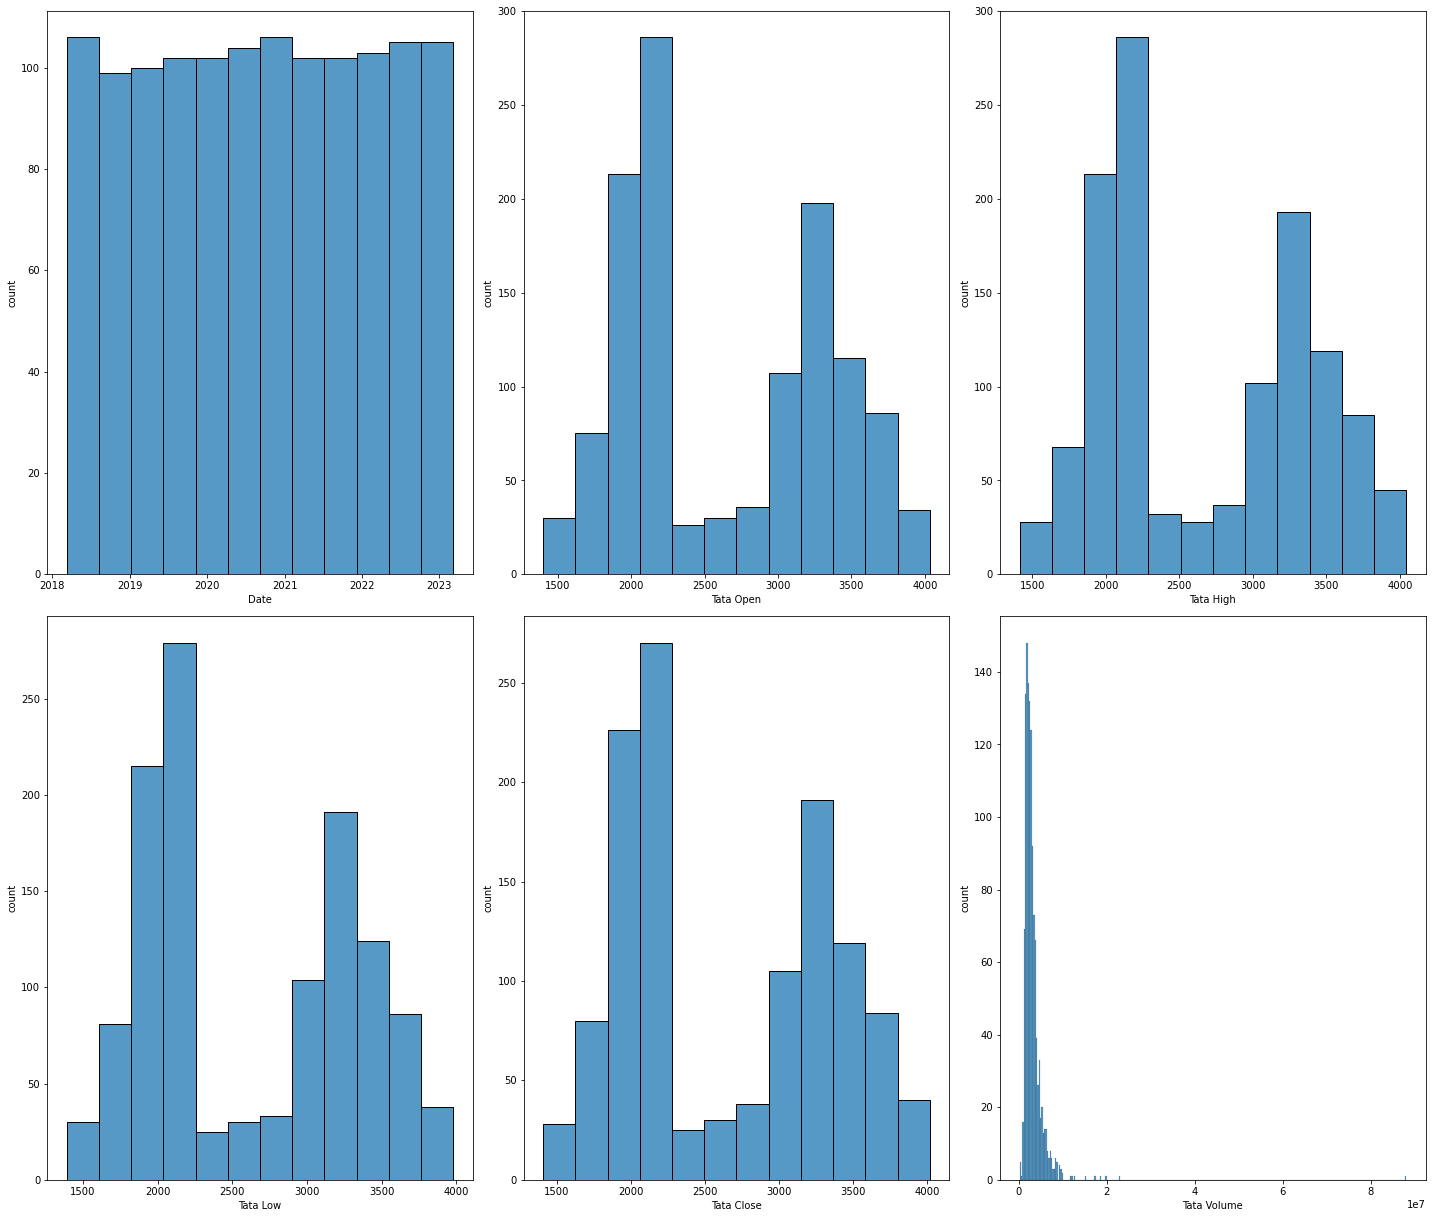

In [15]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()    

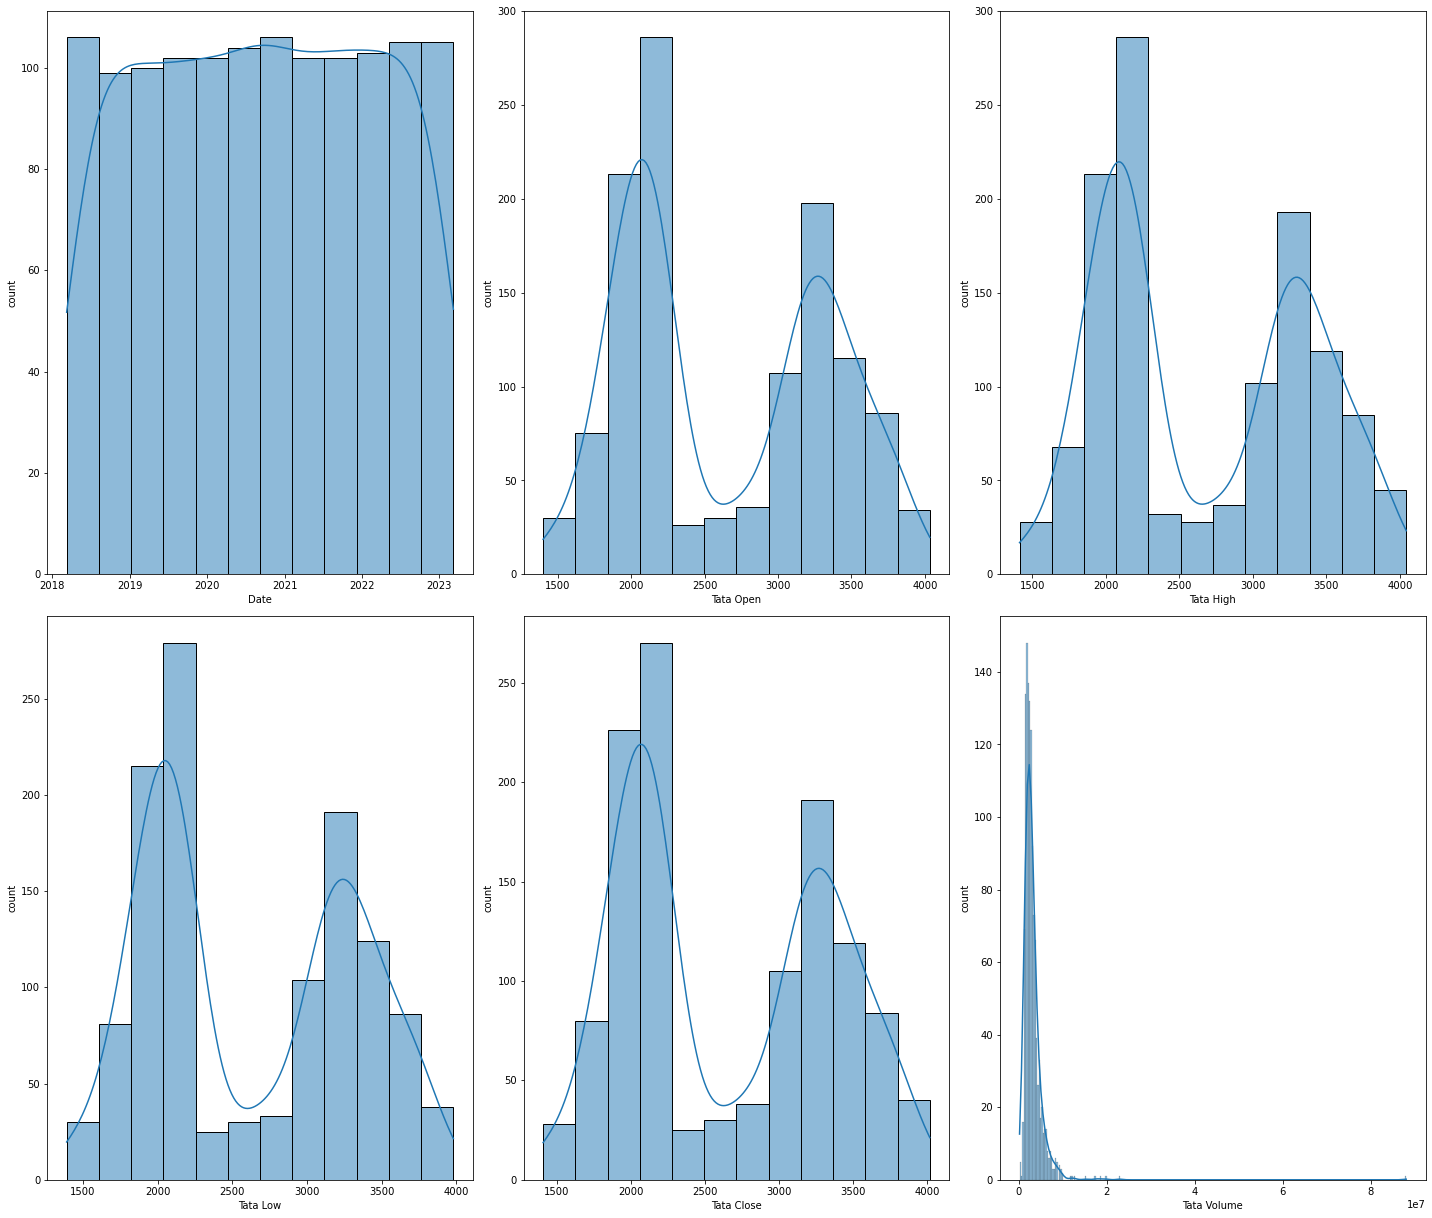

In [16]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()    

In [17]:
# Insights 
# Top Valume are representing normal distribution
# Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Adj Close are representing not normal distribution

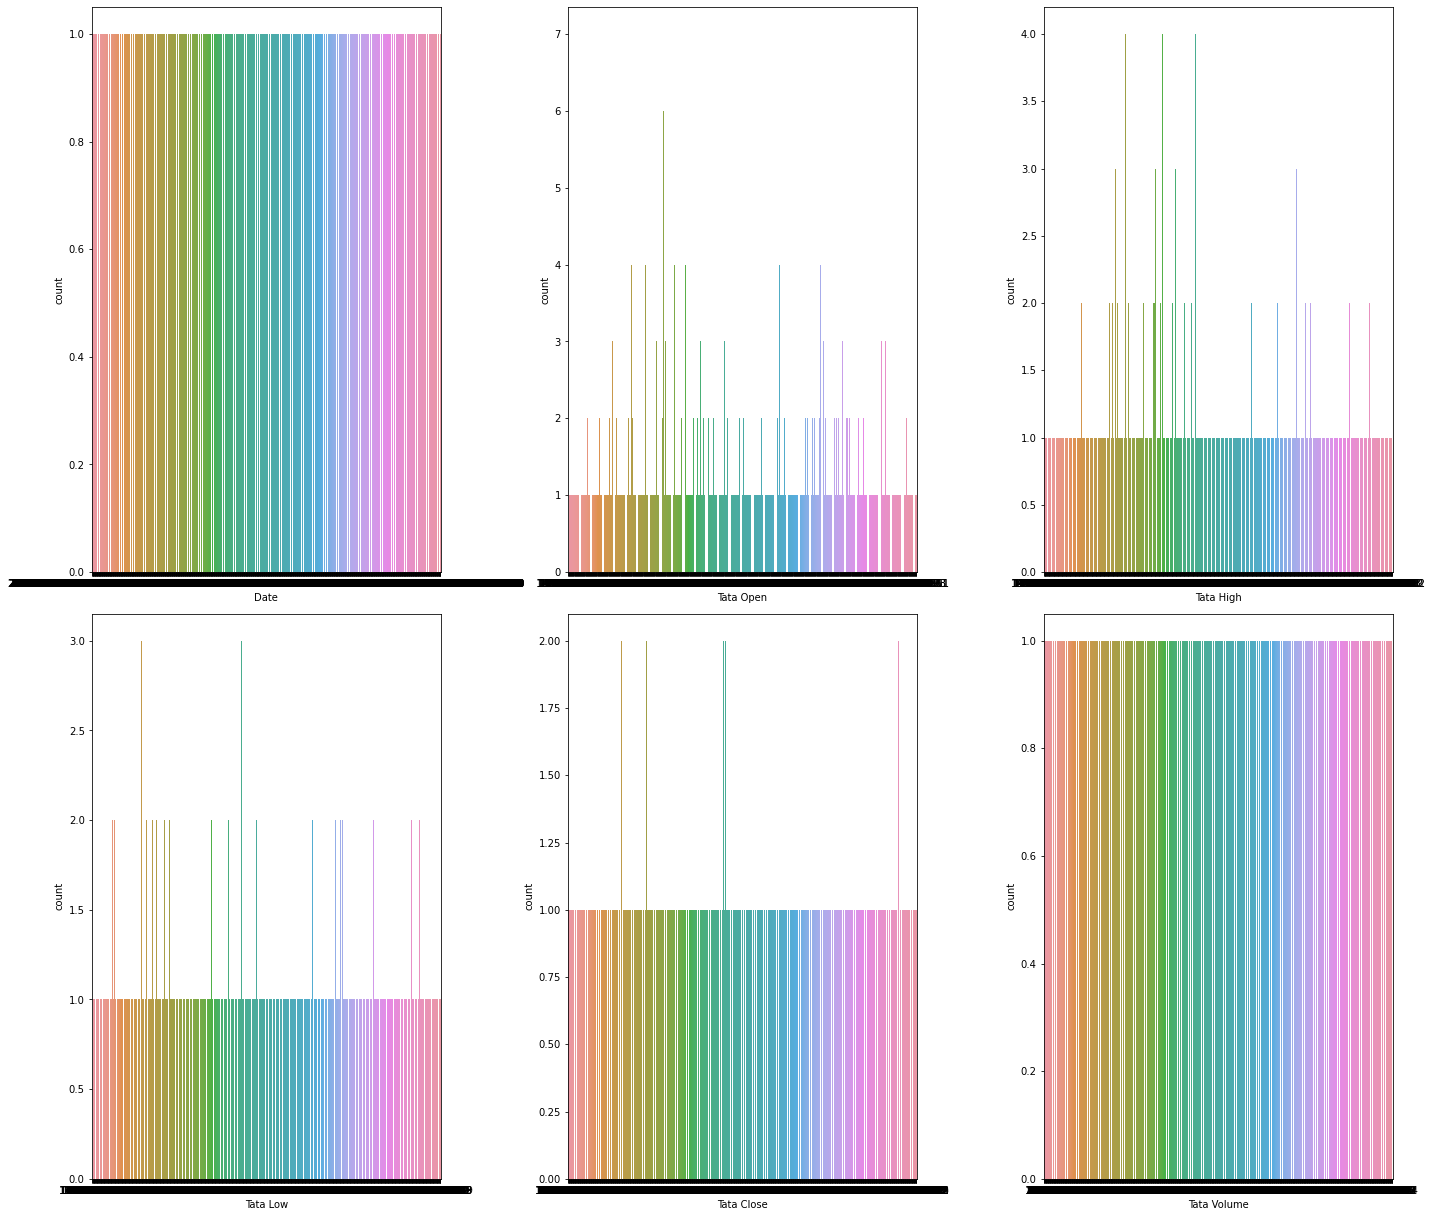

In [19]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [20]:
# Bivariate Analysis

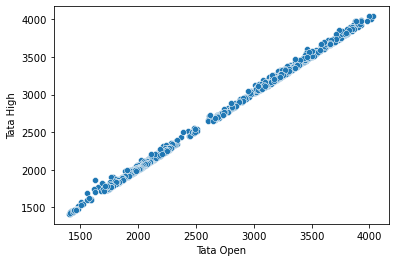

In [21]:
sns.scatterplot(data=data,x="Tata Open",y="Tata High")
plt.show()

In [22]:
# Insights
# there is a high correlation between Tota Open and Tata High
# there is a positive relationship between Tata Open and Tata High.

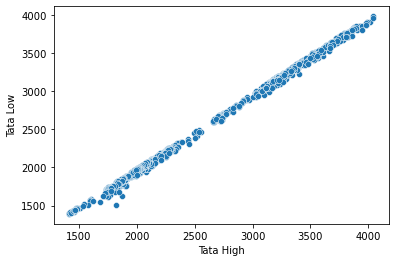

In [23]:
sns.scatterplot(data=data,x="Tata High",y="Tata Low")
plt.show()

In [24]:
# Insights
# there is a high correlation between Tota High and Tata Low
# there is a positive relationship between Tata High and Tata Low.

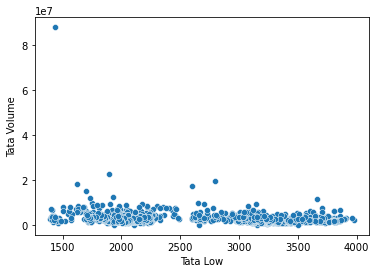

In [25]:
sns.scatterplot(data=data,x="Tata Low",y="Tata Volume")
plt.show()

In [26]:
# Insights
# there is a Low correlation between Tota Low and Tata Volume
# there is a positive relationship between Tata low and Tata Volume.

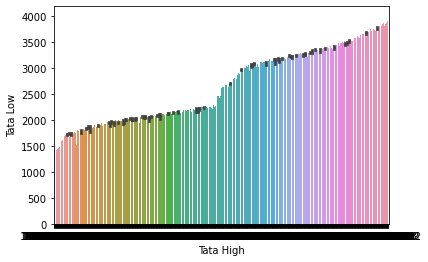

In [27]:
sns.barplot(data=data,x="Tata High",y="Tata Low")
plt.show()

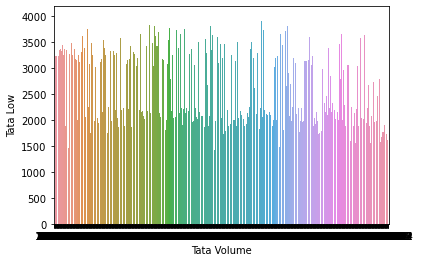

In [28]:
sns.barplot(data=data,x="Tata Volume",y="Tata Low")
plt.show()

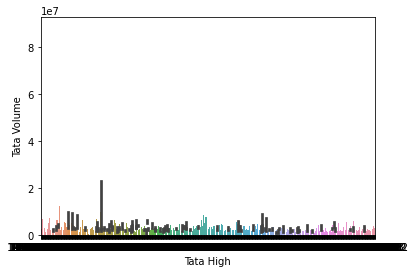

In [29]:
sns.barplot(data=data,x="Tata High",y="Tata Volume")
plt.show()

In [30]:
# Multivariate Analysis

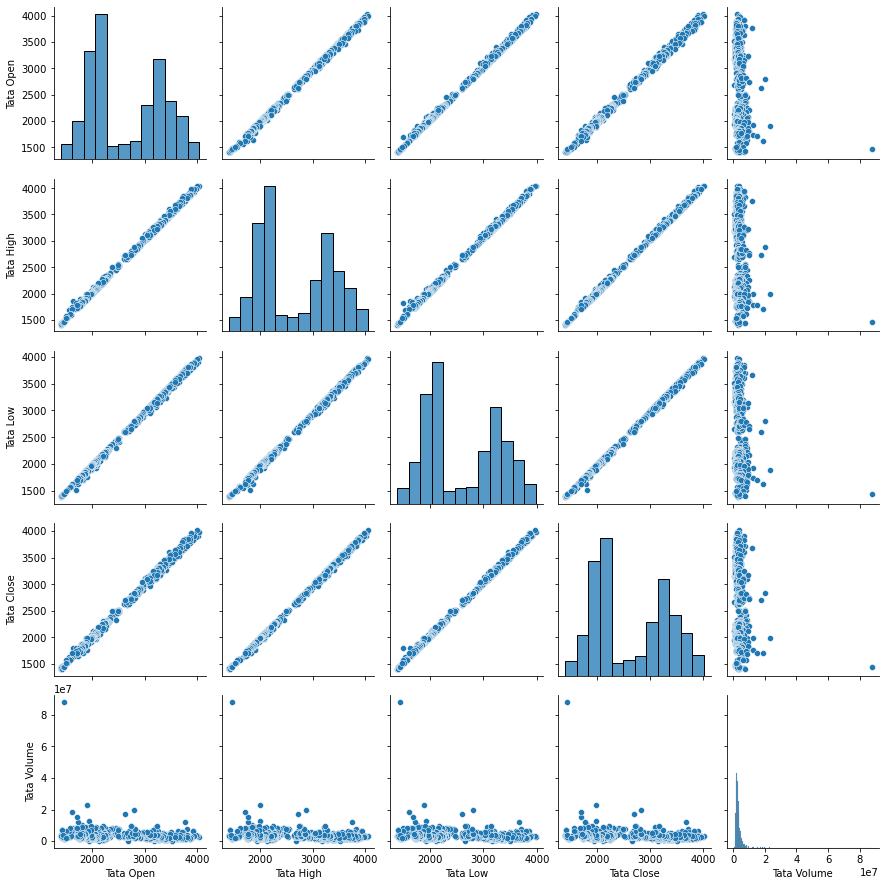

In [31]:
sns.pairplot(data=data,)
plt.show()

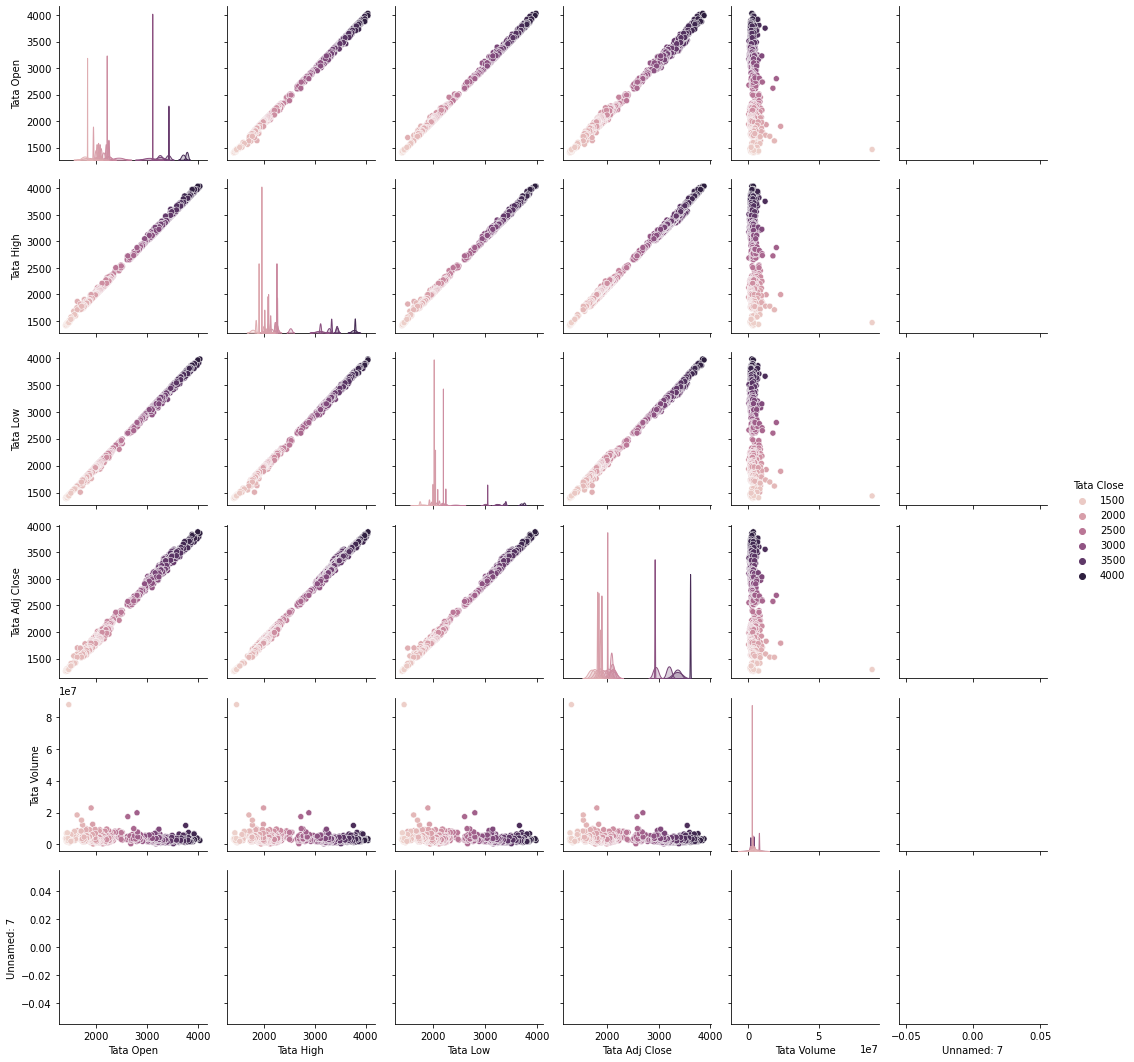

In [3]:
sns.pairplot(data=data,hue="Tata Close")
plt.show()

# Data Preprocessing

In [32]:
# Check for missing values and handle them
data.isnull()

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1231,False,False,False,False,False,False
1232,False,False,False,False,False,False
1233,False,False,False,False,False,False
1234,False,False,False,False,False,False


In [33]:
data.isnull().sum()

Date           0
Tata Open      0
Tata High      0
Tata Low       0
Tata Close     0
Tata Volume    0
dtype: int64

# Check For Duplicates

In [34]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1231    False
1232    False
1233    False
1234    False
1235    False
Length: 1236, dtype: bool

In [35]:
data.duplicated().sum()

0

In [36]:
data

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume
0,2023-03-08,3364.000000,3396.000000,3330.850098,3390.399902,1844590
1,2023-03-06,3361.899902,3404.949951,3359.000000,3371.850098,1334132
2,2023-03-03,3354.000000,3358.000000,3331.100098,3342.149902,1043190
3,2023-03-02,3361.000000,3369.899902,3318.000000,3321.449951,1556538
4,2023-03-01,3323.000000,3389.000000,3315.000000,3385.699951,1669307
...,...,...,...,...,...,...
1231,2018-03-15,1447.500000,1451.275024,1427.800049,1434.849976,2348906
1232,2018-03-14,1446.474976,1461.525024,1437.525024,1443.449951,3668668
1233,2018-03-13,1462.449951,1469.849976,1436.000000,1443.400024,88067154
1234,2018-03-12,1521.500000,1541.949951,1517.750000,1526.074951,2091340


# Check with outliers

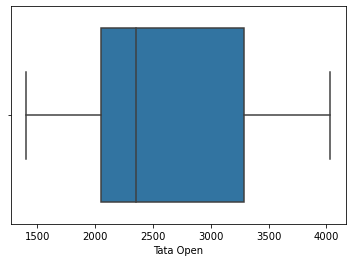

In [58]:
sns.boxplot(x=data["Tata Open"])
plt.show()

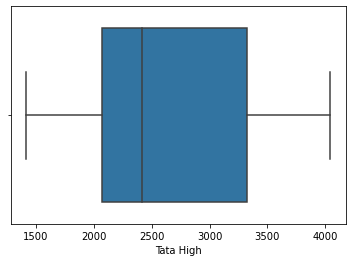

In [59]:
sns.boxplot(x=data["Tata High"])
plt.show()

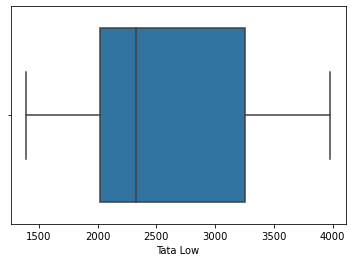

In [60]:
sns.boxplot(x=data["Tata Low"])
plt.show()

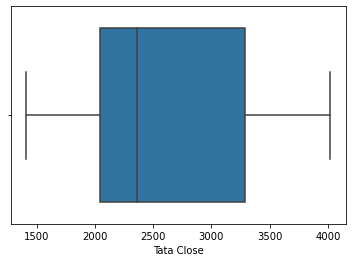

In [61]:
sns.boxplot(x=data["Tata Close"])
plt.show()

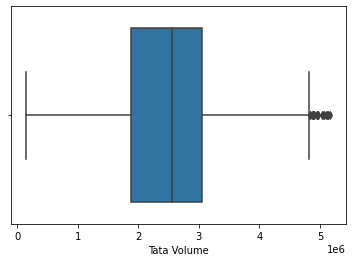

In [62]:
sns.boxplot(x=data["Tata Volume"])
plt.show()

In [63]:
# how to find  those outliers
 # 1. IQR Method

In [64]:
# find Q1 and Q3
Q1=data["Tata Volume"].quantile(0.25)
print("lower quartile",Q1)
Q3=data["Tata Volume"].quantile(0.75)
print("upper quartile",Q3)

lower quartile 1873852.0
upper quartile 3052709.5


In [65]:
# find IQR
IQR=Q3-Q1
IQR

1178857.5

In [66]:
# find lower limit and upper limit
lower_limit=1873852.0-1.5*1663921.5
print("lower limit is",lower_limit)
upper_limit=3537773.5+1.5*1663921.5
print("upper limit is",upper_limit)

lower limit is -622030.25
upper limit is 6033655.75


In [67]:
# percentage of outliers
len(data.loc[data['Tata Volume']>upper_limit])/len(data)

0.0

In [68]:
# Find values above upper_limit
data.loc[data['Tata Volume']>upper_limit]

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume


In [69]:
# Find values above lower_limit
data.loc[data['Tata Volume']<lower_limit]

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume


In [70]:
# how to handle outliers
#since data is not normal will replace outliers with median
data.loc[data['Tata Volume']>upper_limit,"Tata Volume"]=data["Tata Volume"].median()

<AxesSubplot:xlabel='Tata Volume'>

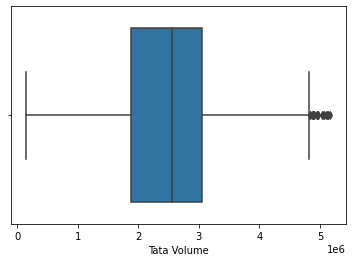

In [71]:
# check are there any outliers in Newspaper
sns.boxplot(x=data["Tata Volume"])

# Feature Engineering

In [102]:
data.corr()

,Tata Open,Tata High,Tata Low,Tata Close,Tata Volume
Tata Open,1.000000,0.999351,0.999340,0.998614,-0.240475
Tata High,0.999351,1.000000,0.999277,0.999455,-0.233663
Tata Low,0.999340,0.999277,1.000000,0.999419,-0.247649
Tata Close,0.998614,0.999455,0.999419,1.000000,-0.241691
Tata Volume,-0.240475,-0.233663,-0.247649,-0.241691,1.000000


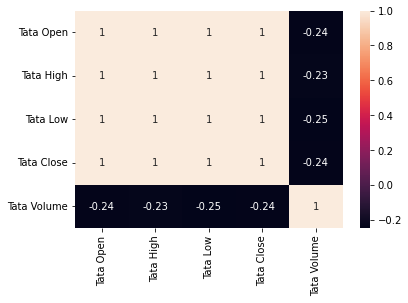

In [125]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# split data into x and y

In [139]:
x=data[["Tata Open","Tata High","Tata Low","Tata Volume"]]
y=data[["Tata Close"]]

In [140]:
x

,Tata Open,Tata High,Tata Low,Tata Volume
0,3364.000000,3396.000000,3330.850098,1844590.0
1,3361.899902,3404.949951,3359.000000,1334132.0
2,3354.000000,3358.000000,3331.100098,1043190.0
3,3361.000000,3369.899902,3318.000000,1556538.0
4,3323.000000,3389.000000,3315.000000,1669307.0
...,...,...,...,...
1231,1447.500000,1451.275024,1427.800049,2348906.0
1232,1446.474976,1461.525024,1437.525024,3668668.0
1233,1462.449951,1469.849976,1436.000000,2558723.5
1234,1521.500000,1541.949951,1517.750000,2091340.0


In [141]:
y

,Tata Close
0,3390.399902
1,3371.850098
2,3342.149902
3,3321.449951
4,3385.699951
...,...
1231,1434.849976
1232,1443.449951
1233,1443.400024
1234,1526.074951


# Split data for traning and testing

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [143]:
x_train.shape

(865, 4)

In [144]:
y_train.shape

(865, 1)

In [145]:
x_test.shape

(371, 4)

In [146]:
y_test.shape

(371, 1)

# Model Building

In [147]:
# import linear Regression model
from sklearn.linear_model import LinearRegression

In [148]:
# initialise model
Model = LinearRegression()

In [149]:
# train model with x_train and y_train
Model.fit(x_train,y_train)

LinearRegression()

In [155]:
# Make predication/test model
y_pred=Model.predict(x_test)
pd.DataFrame(y_pred)

,0
0,3147.920495
1,3054.524127
2,2189.066306
3,1892.782658
4,3859.838387
...,...
366,3682.602880
367,1977.077269
368,2148.109160
369,3404.632514


In [157]:
y_test

,Tata Close
164,3113.800049
162,3038.750000
892,2180.050049
1036,1893.050049
286,3859.899902
...,...
236,3707.699951
997,1985.150024
669,2157.149902
70,3395.250000


In [177]:
df=y_test.copy()

In [178]:
df["y_pred"]=y_pred

In [179]:
df

,Tata Close,y_pred
164,3113.800049,3147.920495
162,3038.750000,3054.524127
892,2180.050049,2189.066306
1036,1893.050049,1892.782658
286,3859.899902,3859.838387
...,...,...
236,3707.699951,3682.602880
997,1985.150024,1977.077269
669,2157.149902,2148.109160
70,3395.250000,3404.632514


In [165]:
# slopes/coefficient of x
Model.coef_

array([[-5.44035469e-01,  8.46700185e-01,  6.95395589e-01,
        -1.70594603e-06]])

In [166]:
#intercept
Model.intercept_

array([6.03800586])

# Evaluate the Model

In [167]:
# loss functions to khow the difference between actual and predicted values
# Different Error/loss functions in Regression algorithm are
# MSE(mean squared error)
# MAE(mean absolute error)
# RMSE(Root mean squared error)

In [168]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [169]:
#MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

203.4328971970635

In [170]:
#MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

10.902165576360698

In [171]:
#RMSE
RMSE=np.sqrt(MSE)
RMSE

14.262990471744118

In [172]:
# R2-score
r2_score(y_test,y_pred)

0.9995998789938608

In [173]:
# 99% better model to make prediction
# model has learnt  915 of the information2

In [174]:
# Adjusted R2 Score

In [175]:
y_test.shape

(371, 1)

In [176]:
adj_r2=1-(1-0.99)*(371-1)/(371-4-1)
adj_r2

0.9898907103825136

In [ ]:
# clearly adjusted r2 < r2_score